## Friis Free-Space Path Loss

The Friis free-space equation is given by:

$$P_{rx} = P_{tx}G_{tx}G_{rx}\left(\frac{\lambda^2}{4\pi}\right)\left(\frac{1}{4\pi R^2}\right)$$

where
- $P_{rx}$ is the power received out the receive antenna
- $P_{tx}$ is the power delivered to the transmit antenna
- $G_{tx}$ is the transmit antenna gain,
- $G_{rx}$ is the receive antenna gain,
- $\frac{\lambda^2}{4\pi}$ is the effective aperture of an ideal isotropic antenna,
- $4\pi R^2$ is the surface area of a sphere of radius $R$,
- $R$ is the distance (or range) between transmitter and receiver,
- $f$ is the signal frequency

Typically the gains are separated out and the free space path loss is computed as:

$$L_{\mathrm{fs}}(\mathrm{dB}) = 20\log_{10}\left(\frac{4\pi R}{\lambda}\right)$$

with $\lambda = c / f$.

This loss is actually the combination of two separate effects. The spherical loss is simply the loss which is the effect of the spherical expansion of the wave, and is just dividing by the surface of the sphere with radius R. This is why this library separates the two losses into spherical loss and aperture loss. It is interesting and instructive to see the loss purely due to distance, and the loss associated with the reduced effective aperture at higher frequencies.

## Example Usage

In [4]:
import astropy.units as u
from spacelink.core import (
    return_loss_to_vswr,
    vswr_to_return_loss,
    wavelength,
    frequency,
    mismatch_loss,
    to_linear,
    to_dB,
    spreading_loss,
    aperture_loss,
    free_space_path_loss
)
print(f"Spreading Loss (1000 km): {spreading_loss(1000 * u.km):.2f}")
print(f"Aperture Loss (10 GHz): {aperture_loss(10 * u.GHz):.2f}")
print(f"FSPL (1000 km, 10 GHz): {free_space_path_loss(1000 * u.km, 10 * u.GHz):.2f}")

Spreading Loss (1000 km): 130.99 dB
Aperture Loss (10 GHz): 41.46 dB
FSPL (1000 km, 10 GHz): 172.45 dB


Path Loss Component Values (dB)
---------------------------------------------------------------------------
Distance (km)  Spreading Loss      
100.0           km110.99               dB
1000.0          km130.99               dB
10000.0         km150.99               dB
100000.0        km170.99               dB
384400.0        km182.69               dB


Frequency (GHz)Aperture Loss       
1.0             GHz21.46                dB
2.25            GHz28.50                dB
8.4             GHz39.94                dB
32.0            GHz51.56                dB


Free Space Path Loss (dB) Table
---------------------------------------------------------------------------
Distance (km)  1.0 GHz GHz          2.25 GHz GHz          8.4 GHz GHz          32.0 GHz GHz          
100.0           km132.45          dB139.49          dB150.93          dB162.55          dB
1000.0          km152.45          dB159.49          dB170.93          dB182.55          dB
10000.0         km172.45          dB179.49

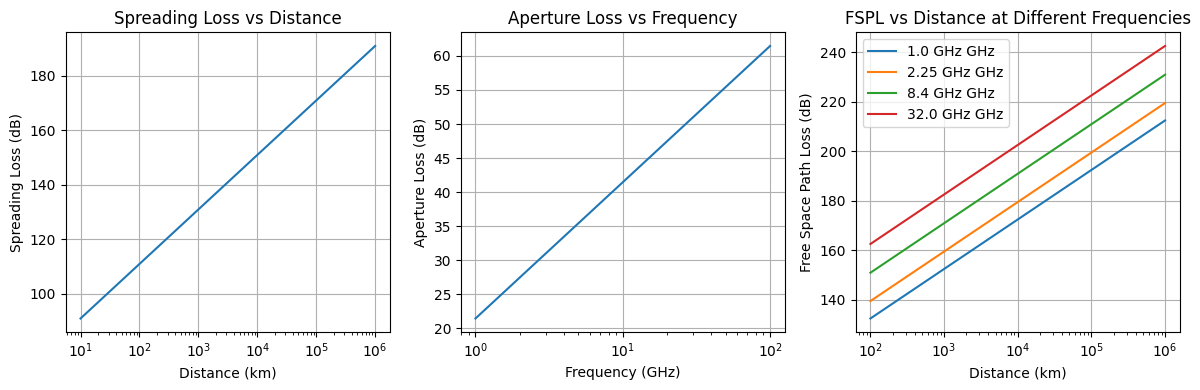

In [5]:
import matplotlib.pyplot as plt
import numpy as np

distances = [100, 1000, 10000, 100000, 384400] * u.km
freqs = [1, 2.25, 8.4, 32] * u.GHz

print("Path Loss Component Values (dB)")
print("-" * 75)
print(f"{'Distance (km)':<15}{'Spreading Loss':<20}")
for d in distances:
    sl = spreading_loss(d)
    print(f"{d:<15}{sl:<20.2f}")

print("\n")
print(f"{'Frequency (GHz)':<15}{'Aperture Loss':<20}")
for f in freqs:
    al = aperture_loss(f)
    print(f"{f:<15}{al:<20.2f}")

print("\n")
print("Free Space Path Loss (dB) Table")
print("-" * 75)
header = f"{'Distance (km)':<15}"
for f in freqs:
    header += f"{f} GHz{'':<10}"
print(header)
for d in distances:
    row = f"{d:<15}"
    for f in freqs:
        loss = free_space_path_loss(d, f)
        row += f"{loss:<15.2f}"
    print(row)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
dist_range = np.logspace(1, 6, 500)
sp_loss = [spreading_loss(d * u.km).value for d in dist_range]
plt.plot(dist_range, sp_loss)
plt.xscale("log")
plt.xlabel("Distance (km)")
plt.ylabel("Spreading Loss (dB)")
plt.title("Spreading Loss vs Distance")
plt.grid(True)

plt.subplot(1, 3, 2)
freq_range = np.logspace(9, 11, 500)
ap_loss = [aperture_loss(f * u.Hz).value for f in freq_range]
plt.plot(freq_range / 1e9, ap_loss)
plt.xscale("log")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Aperture Loss (dB)")
plt.title("Aperture Loss vs Frequency")
plt.grid(True)

plt.subplot(1, 3, 3)
dist_range_km = np.logspace(2, 6, 500)
for f in freqs:
    fspl_values = [free_space_path_loss(d * u.km, f).value for d in dist_range_km]
    plt.plot(dist_range_km, fspl_values, label=f"{f} GHz")
plt.xscale("log")
plt.xlabel("Distance (km)")
plt.ylabel("Free Space Path Loss (dB)")
plt.title("FSPL vs Distance at Different Frequencies")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()